# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
from getMatchData import get_match_data
import numpy as np
import pandas as pd
import getPlayersData as gpd
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data

In [2]:
match_data = get_match_data()

Downloaded todays data


In [3]:
match_data.tail()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
133543,ESPORTSTMNT06_2580442,complete,NaN,ESLOL,2023,Summer,0,2022-09-14 20:25:14,5,12.16,...,112.0,1344.0,1439.0,4.0,3.0,6.0,1.0,1.0,1.0,4.0
133544,ESPORTSTMNT06_2580442,complete,NaN,ESLOL,2023,Summer,0,2022-09-14 20:25:14,5,12.16,...,127.0,792.0,-504.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0
133545,ESPORTSTMNT06_2580442,complete,NaN,ESLOL,2023,Summer,0,2022-09-14 20:25:14,5,12.16,...,19.0,1195.0,861.0,7.0,2.0,5.0,0.0,0.0,1.0,3.0
133546,ESPORTSTMNT06_2580442,complete,NaN,ESLOL,2023,Summer,0,2022-09-14 20:25:14,5,12.16,...,485.0,-5308.0,-2327.0,-13.0,3.0,4.0,12.0,12.0,24.0,3.0
133547,ESPORTSTMNT06_2580442,complete,NaN,ESLOL,2023,Summer,0,2022-09-14 20:25:14,5,12.16,...,472.0,5308.0,2327.0,13.0,12.0,24.0,3.0,3.0,4.0,12.0


In [4]:
match_data[["gameid", "teamid", "playerid", "position"]].values

array([['ESPORTSTMNT01_2690210',
        'oe:team:68911b3329146587617ab2973106e23',
        'oe:player:38e0af7278d6769d0c81d7c4b47ac1e', 'top'],
       ['ESPORTSTMNT01_2690210',
        'oe:team:68911b3329146587617ab2973106e23',
        'oe:player:637ed20b1e41be1c51bd1a4cb211357', 'jng'],
       ['ESPORTSTMNT01_2690210',
        'oe:team:68911b3329146587617ab2973106e23',
        'oe:player:d1ae0e2f9f3ac1e0e0cdcb86504ca77', 'mid'],
       ...,
       ['ESPORTSTMNT06_2580442',
        'oe:team:79fc65ce199f2e4fe97e277bdef6695',
        'oe:player:3ec9b028e70acf4aaaf81d8034dc5b0', 'sup'],
       ['ESPORTSTMNT06_2580442',
        'oe:team:fc7375b80317eeffe3f05e4d3912626', nan, 'team'],
       ['ESPORTSTMNT06_2580442',
        'oe:team:79fc65ce199f2e4fe97e277bdef6695', nan, 'team']],
      dtype=object)

In [5]:
def invalid_games_checker(invalid_str="NA"):
    
    # Check if "NA" is present
    flag = False
    for element in match_data[["gameid", "teamid", "playerid", "position"]].values:
        for item in element:
            if not isinstance(item, float):
                if invalid_str in item:
                    flag = True
                    if invalid_str:
                        pprint(f"Has {invalid_str}")
                    else:
                        pprint("Has empty string")
                    break
        if flag:
            break

In [6]:
# check NA
invalid_games_checker(invalid_str="NA")

# check empty string
invalid_games_checker(invalid_str="")

# check nan
invalid_games_checker(invalid_str="nan")

# check null
invalid_games_checker(invalid_str="null")



'Has NA'
'Has empty string'


In [7]:
match_data.shape

(133548, 123)

# Cleaning and formatting data

In [8]:
invalid_game_ids = []

# removing the invalid game data for invalid game ids
for gid in match_data.gameid.values:
    if not isinstance(gid, float):
        if "NA" in gid:
            invalid_game_ids.append(gid)

match_data = match_data[~match_data["gameid"].isin(invalid_game_ids)].copy()

In [9]:
match_data.shape

(126984, 123)

In [10]:
# First removing the data that has empty, nan or null string
format_dict = {
    "": np.nan, 
    "nan": np.nan, 
    "null":np.nan
}

# convert all to str
match_data["gameid"] = match_data["gameid"].str.strip()
match_data["teamid"] = match_data["teamid"].str.strip()
match_data["playerid"] = match_data["playerid"].str.strip()

# replace the invalid values to np.nan
# https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/#:~:text=Using%20Pandas%20DataFrame.-,replace(),regular%20expressions%20for%20regex%20substitutions.
match_data = match_data.replace({
    "gameid": format_dict,
    "teamid": format_dict,
    "playerid": format_dict,
    "position": format_dict
})

In [11]:
match_data.shape

(126984, 123)

In [12]:
# Drop nan value
match_data = match_data[match_data.gameid.notna()]
match_data = match_data[match_data.position.notna()]

In [13]:
match_data.shape

(126984, 123)

In [14]:
# Drop duplicates if any
match_data = match_data.drop_duplicates()

In [15]:
match_data.shape

(126984, 123)

- There are no duplicates

# Separating players data from match data

In [16]:
# look into the dataframe for features
player_data = match_data[match_data["position"] != "team"]
player_data.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0


In [17]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105820 entries, 0 to 133545
Columns: 123 entries, gameid to opp_deathsat15
dtypes: float64(93), int64(12), object(18)
memory usage: 100.1+ MB


In [18]:
player_data.date.values
pprint(type(player_data.date.values[0]))

<class 'str'>


In [19]:
# Format date according to datetime
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
# https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
player_data = player_data.astype({"date": "datetime64"})

In [20]:
pprint(type(player_data.date.values[0]))

<class 'numpy.datetime64'>


# Downloading the full players data

In [21]:
gpd.players_data_to_csv(player_data)

# Player Data Cleaning

# Get all the features of players data

In [22]:
player_data.columns

Index(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch',
       ...
       'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15',
       'opp_deathsat15'],
      dtype='object', length=123)

- There are total 123 features but to figure out which features to remove and which features to keep is still in blur
- First look at the CSV file and see if we can remove any feature

In [23]:
player_data_copy = player_data.copy()

## Remove rows where datacompleteness is partial

In [24]:
player_data_copy.datacompleteness.value_counts()

complete    88400
partial     17420
Name: datacompleteness, dtype: int64

- There are 15060 entries that has partial data
- So we take only the complete data

In [25]:
player_data_copy = player_data_copy[player_data_copy.datacompleteness == "complete"]

In [26]:
pprint(player_data.shape)
pprint(player_data_copy.shape)

(105820, 123)
(88400, 123)


## Drop Multiple columns

In [27]:
# dropped column names
dropped_features = [
    "datacompleteness", "url", "firstdragon", "dragons", "opp_dragons", "elementaldrakes",
    "opp_elementaldrakes", "infernals", "mountains", "clouds", "oceans", "chemtechs", "hextechs",
    "dragons (type unknown)", "elders", "opp_elders", "firstherald", "heralds",
    "opp_heralds", "firstbaron", "firsttower", "towers", "opp_towers", "firstmidtower",
    "firsttothreetowers", "turretplates", "opp_turretplates"
]
len(dropped_features)

27

In [28]:
player_data_copy = player_data_copy.drop(dropped_features, axis=1)

In [29]:
player_data_copy.shape

(88400, 96)

- There are 96 features remaining out of which some are important for keeping the data in neo4j database like player name and other such things

In [30]:
player_data_copy.head()

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,1,Blue,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,2,Blue,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,3,Blue,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,4,Blue,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,5,Blue,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0


# Correlation matrix

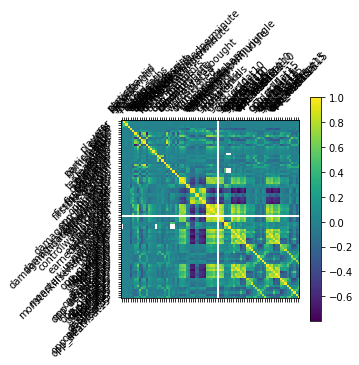

In [31]:
# Correlation matrix
plt.matshow(player_data_copy.corr())
continuous_features = player_data_copy.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation="45")
plt.yticks(range(len(continuous_features)), continuous_features, rotation="45")
plt.colorbar()
plt.show()


- As you can see plotting directly the correlation cannot solve anything, What we can do is plot the correlation plot without the column names

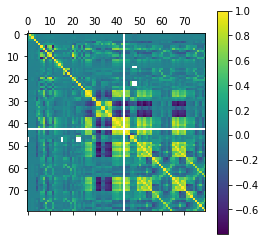

In [32]:
# Correlation matrix
plt.matshow(player_data_copy.corr())
# continuous_features = player_data_copy.describe().columns
# plt.xticks(range(len(continuous_features)), continuous_features, rotation="45")
# plt.yticks(range(len(continuous_features)), continuous_features, rotation="45")
plt.colorbar()
plt.show()

- From this we can infer that where the value is near 1 that has the most correlation

## Lets first look at each column and different values for each column with a histogram

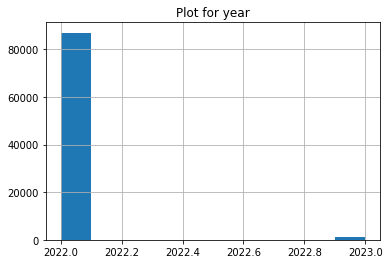

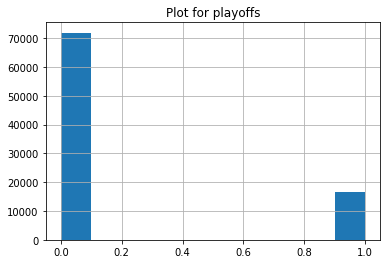

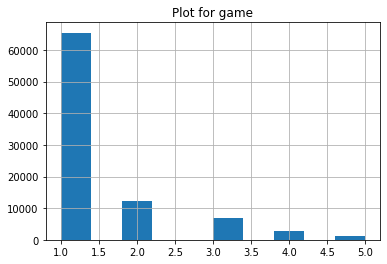

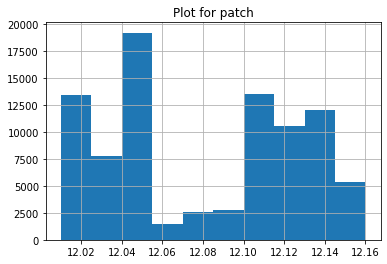

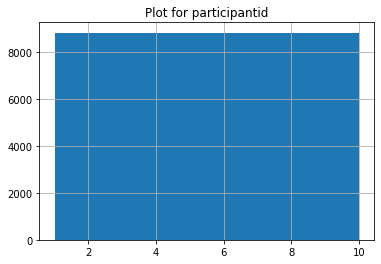

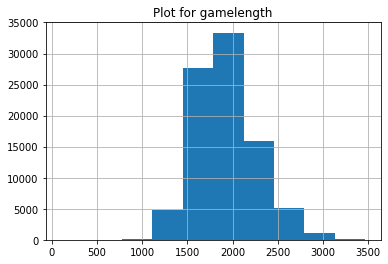

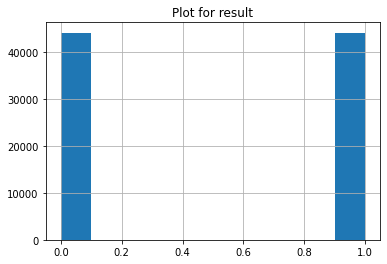

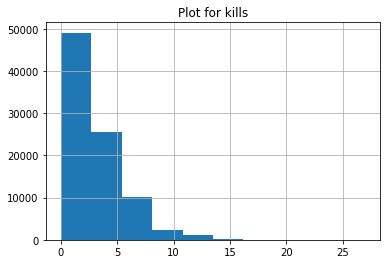

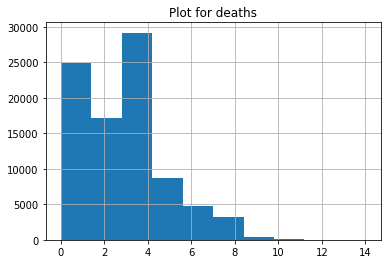

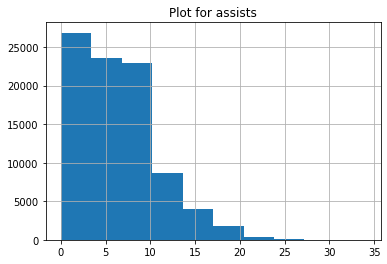

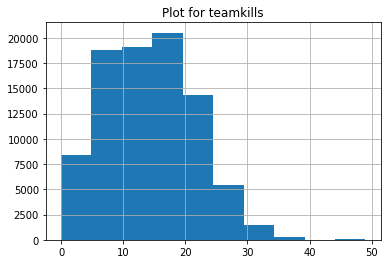

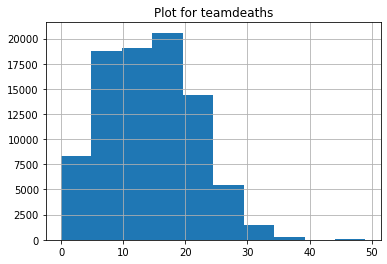

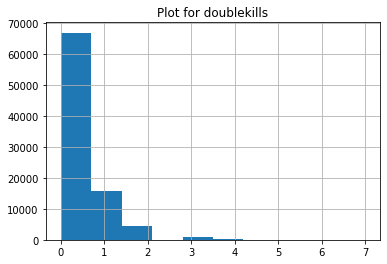

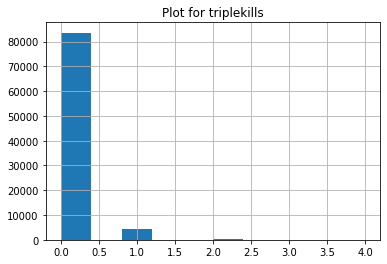

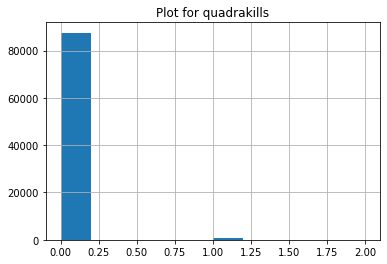

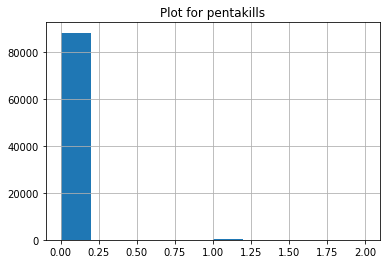

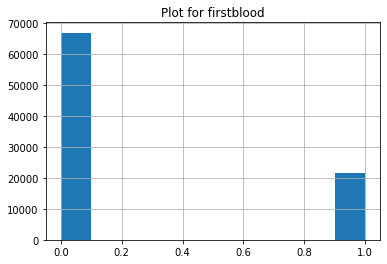

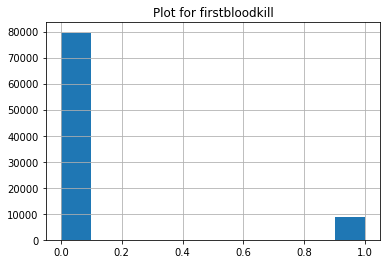

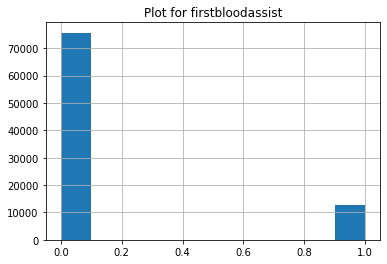

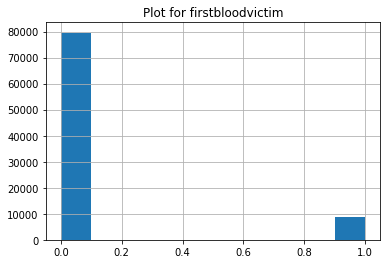

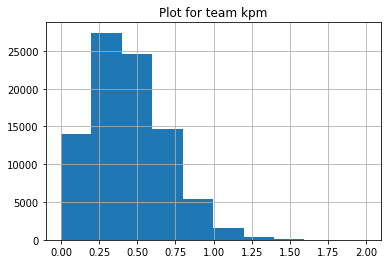

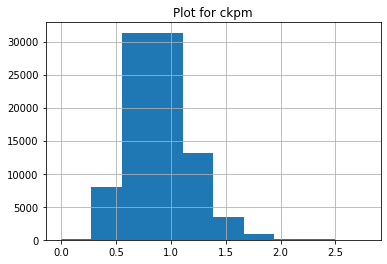

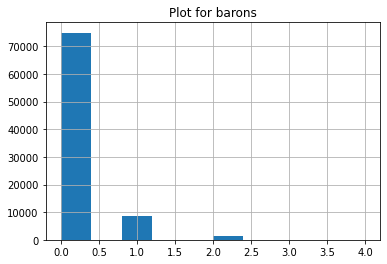

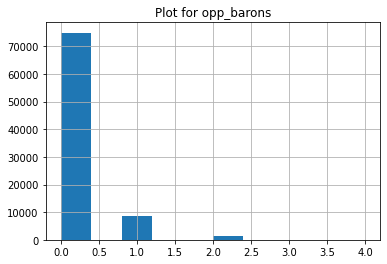

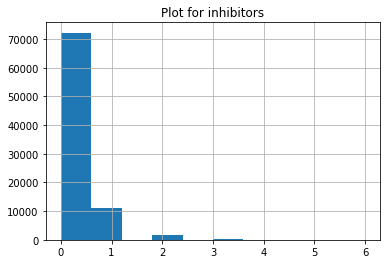

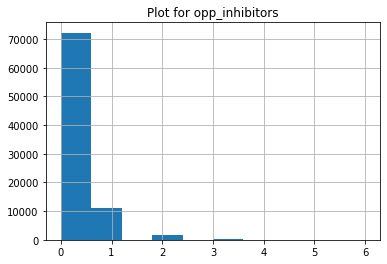

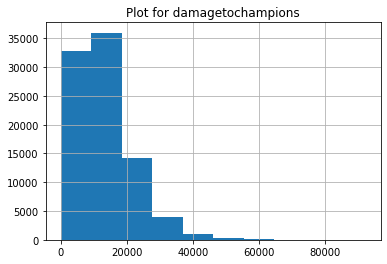

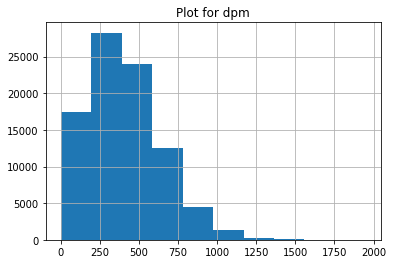

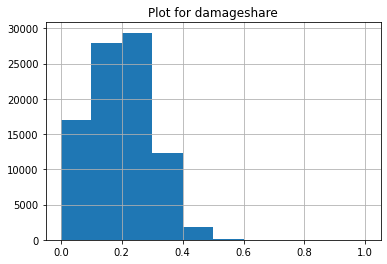

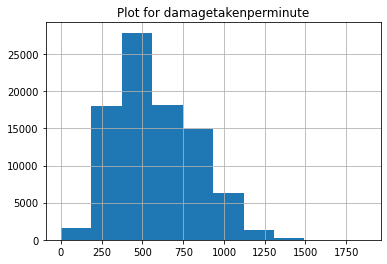

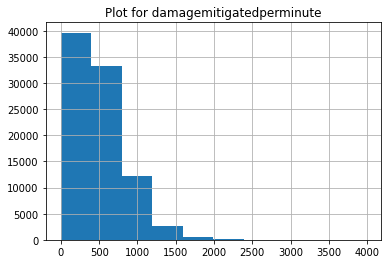

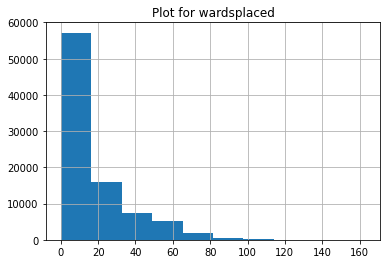

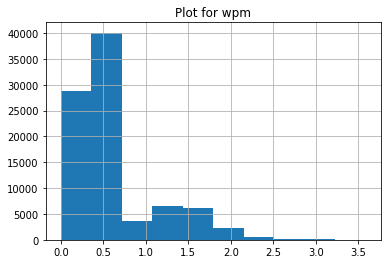

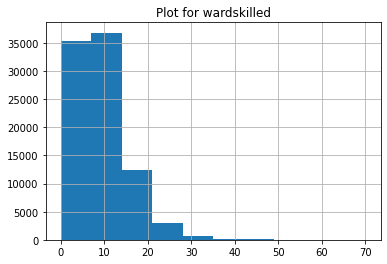

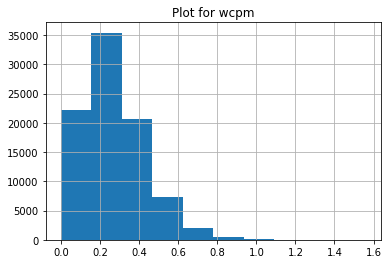

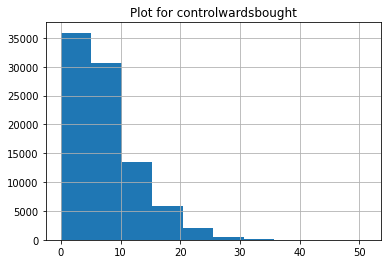

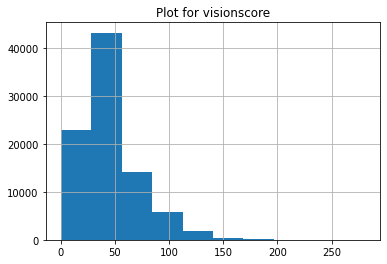

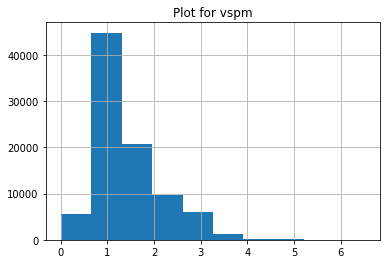

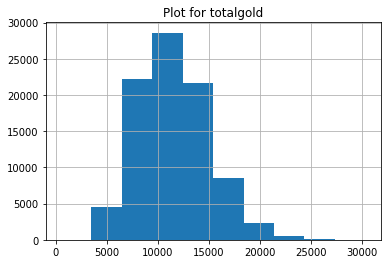

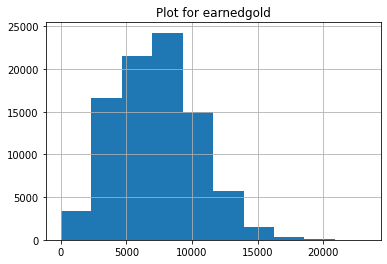

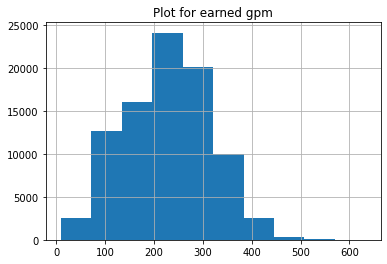

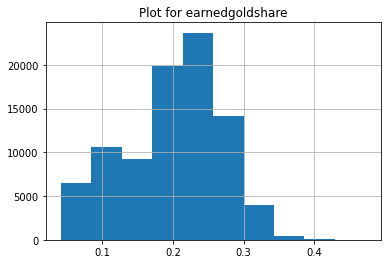

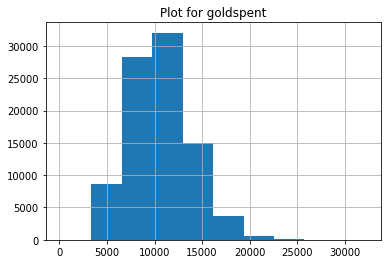

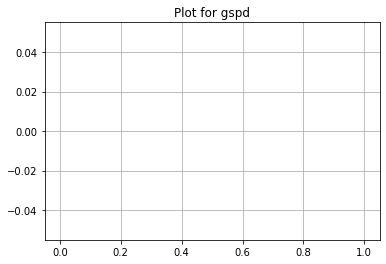

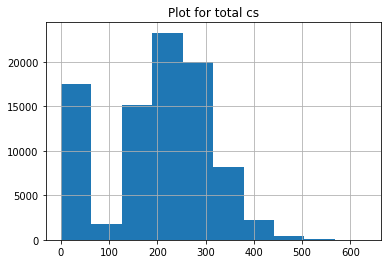

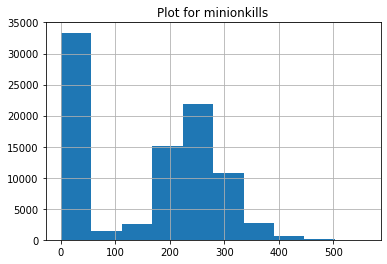

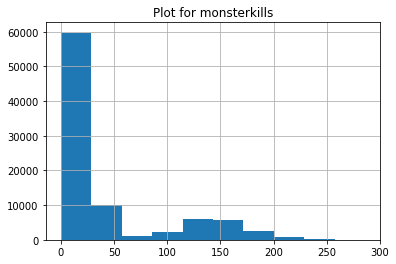

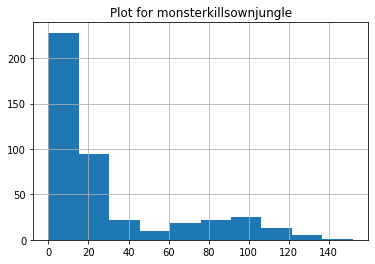

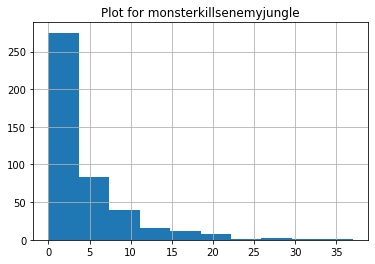

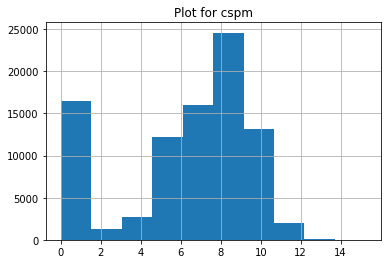

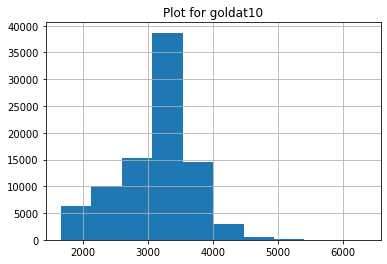

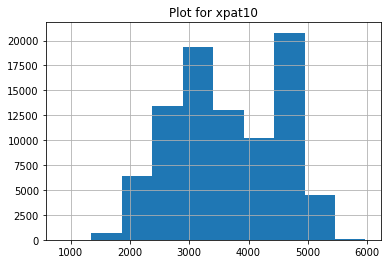

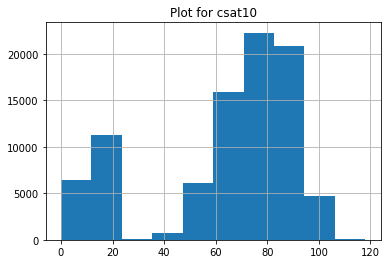

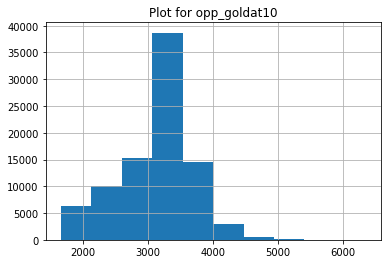

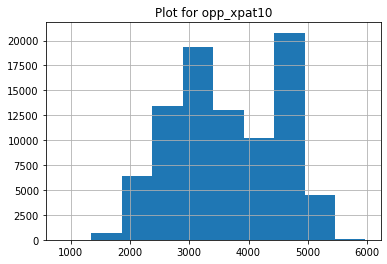

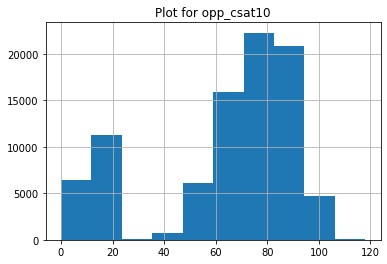

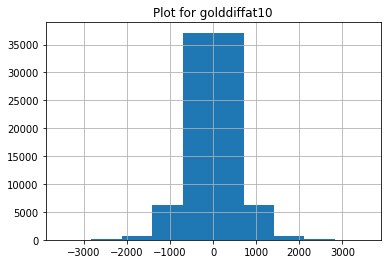

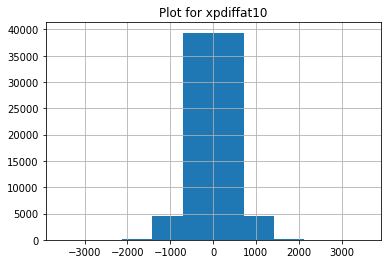

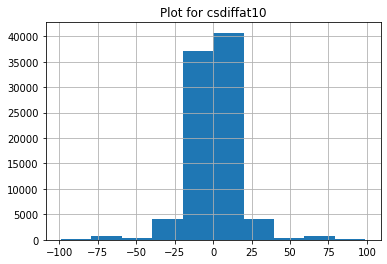

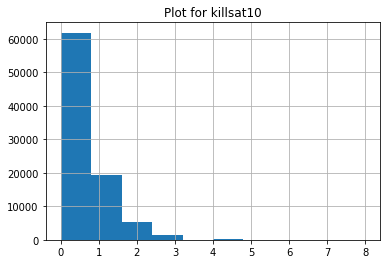

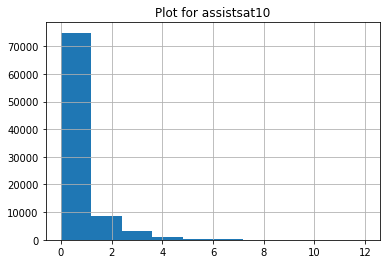

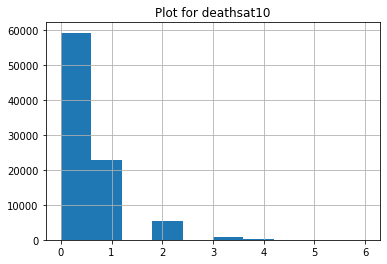

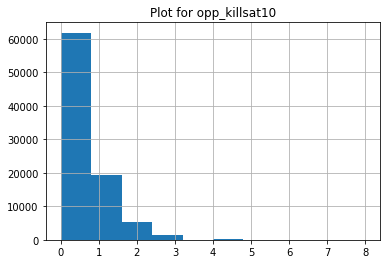

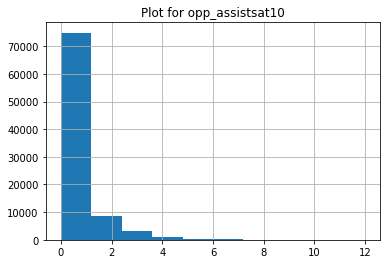

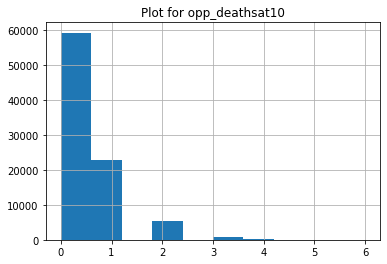

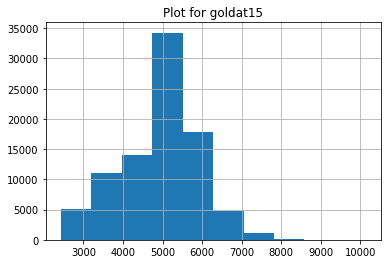

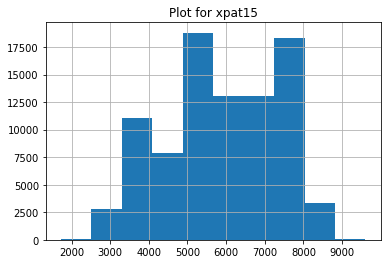

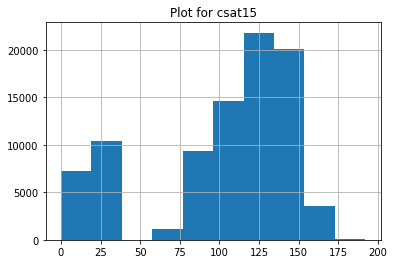

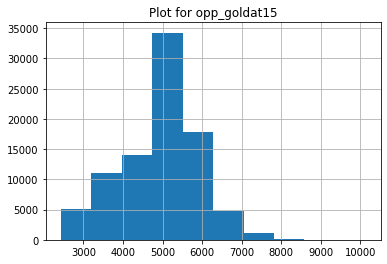

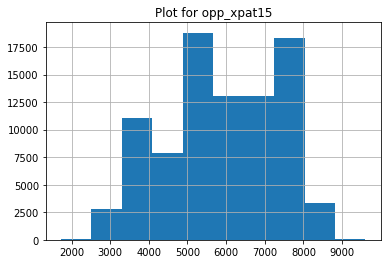

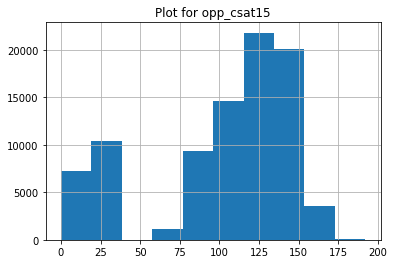

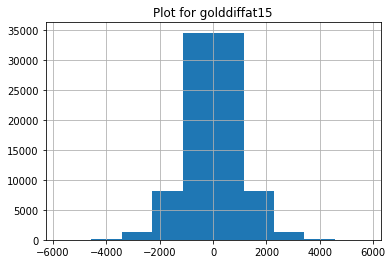

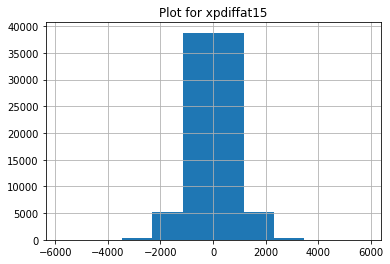

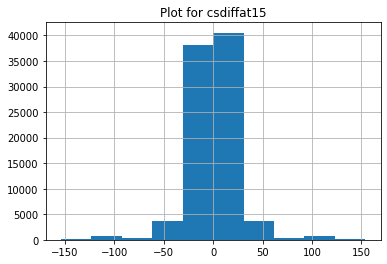

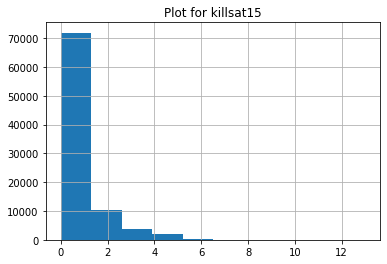

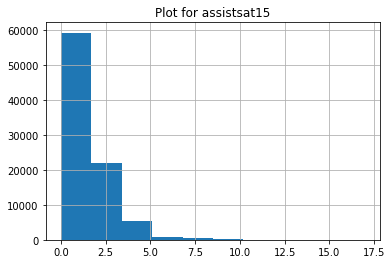

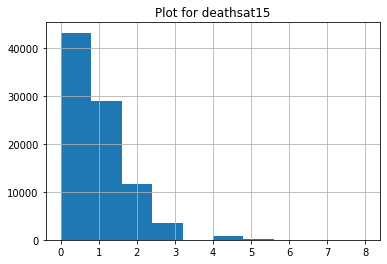

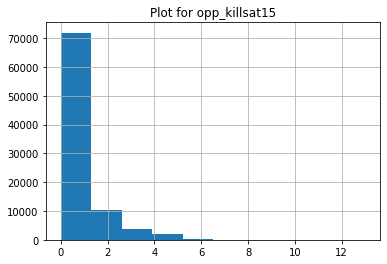

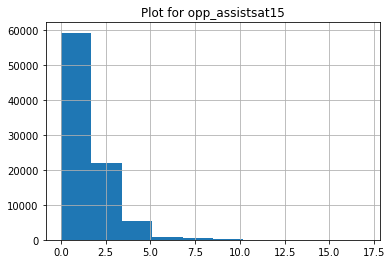

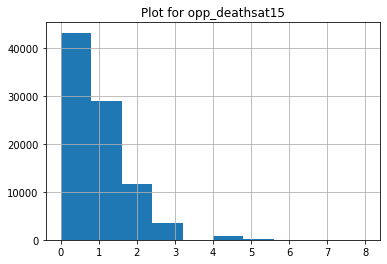

In [33]:
# histogram
for name in player_data_copy.describe().columns:
    player_data_copy[name].hist()
    plt.title(f"Plot for {name}")
    plt.show()

In [34]:
# drop gspd
player_data_copy = player_data_copy.drop(["gspd"], axis=1)

In [35]:
data_len = len(player_data_copy.describe().columns)
print(data_len)

79


### Learn subplots
https://stackoverflow.com/questions/61443444/two-column-subplot-using-matplotlib-and-seaborn

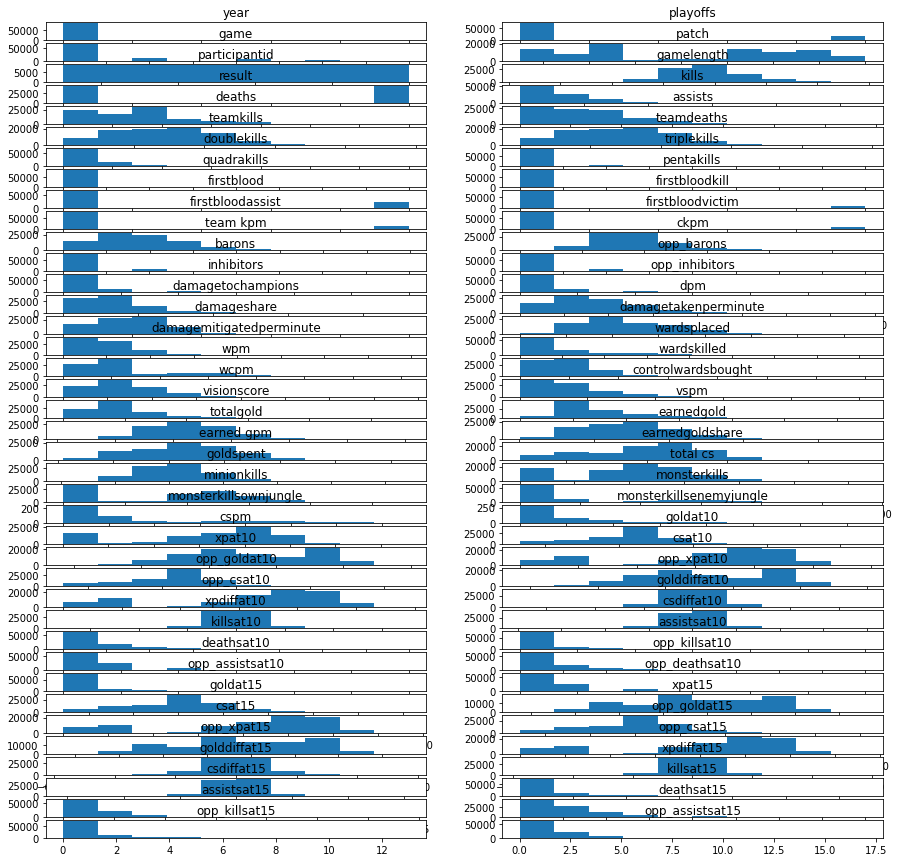

In [36]:
ncols = 2
nrows = data_len // ncols

continuous_features = player_data_copy.describe().columns
fig, ax = plt.subplots(nrows, ncols)
ax=ax.ravel()
for idx, a in enumerate(ax):
    fig.set_figheight(15)
    fig.set_figwidth(15)
    a.hist(player_data_copy[continuous_features[idx]])
    a.set_title(continuous_features[idx])
plt.tight_layout()


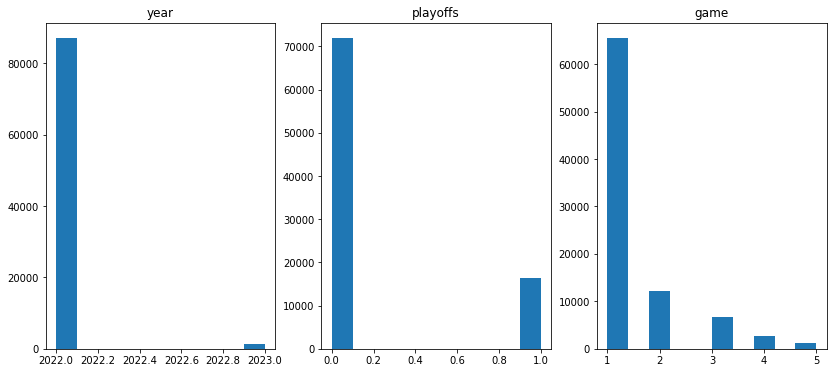

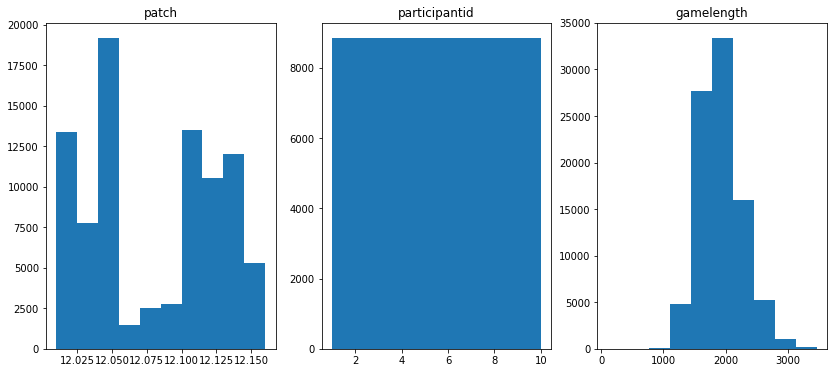

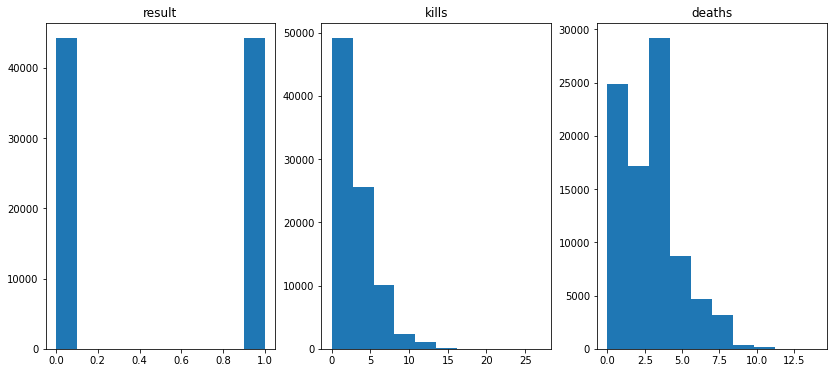

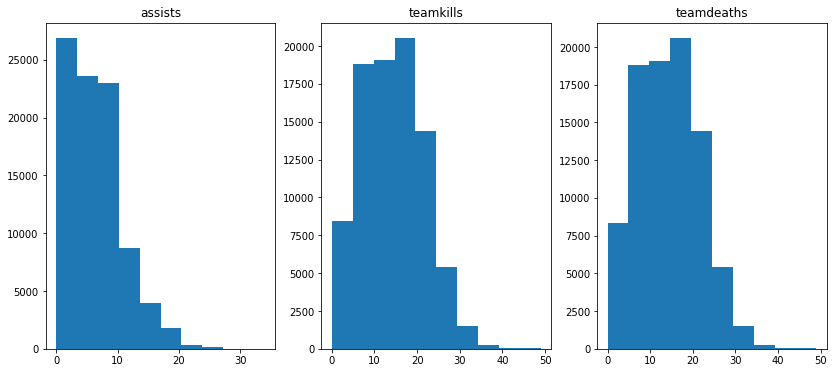

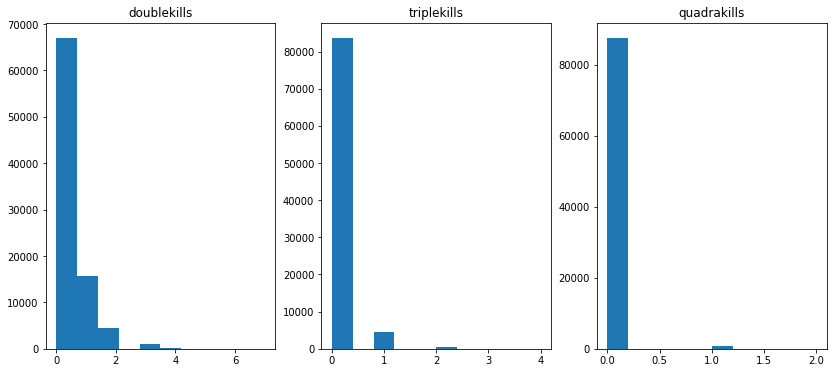

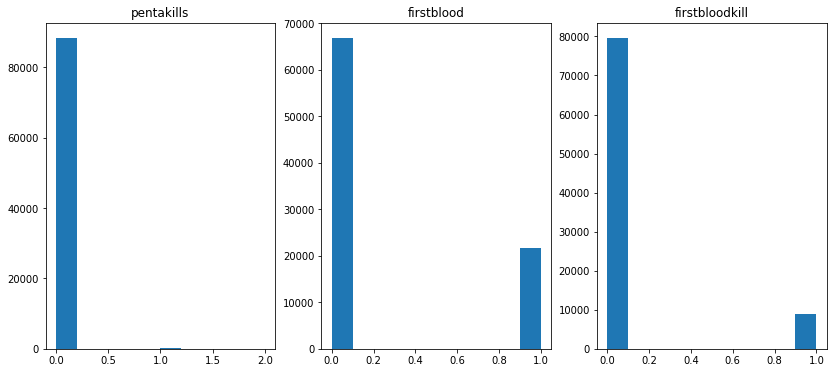

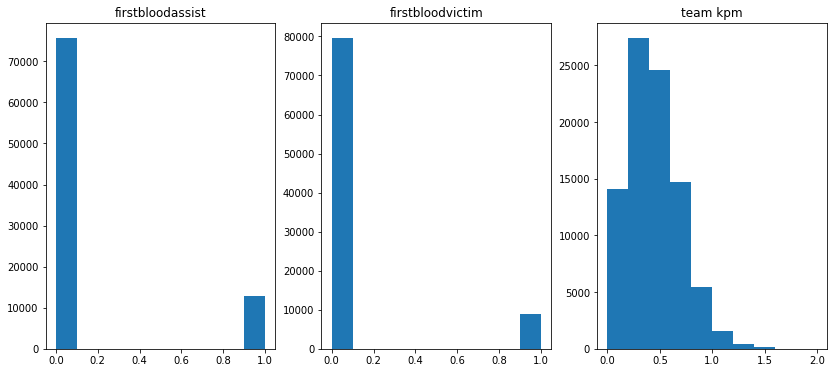

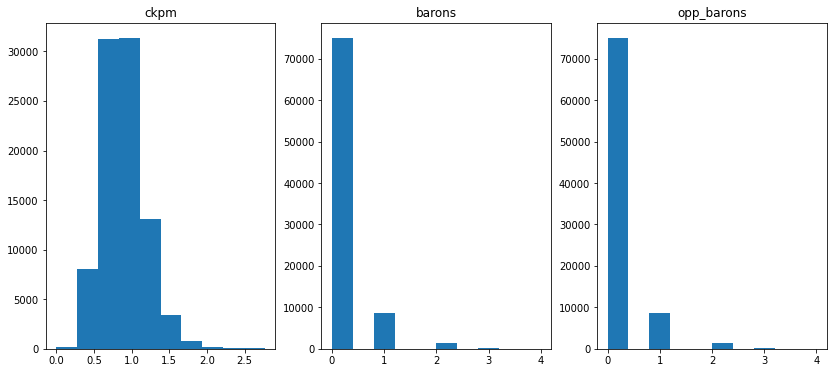

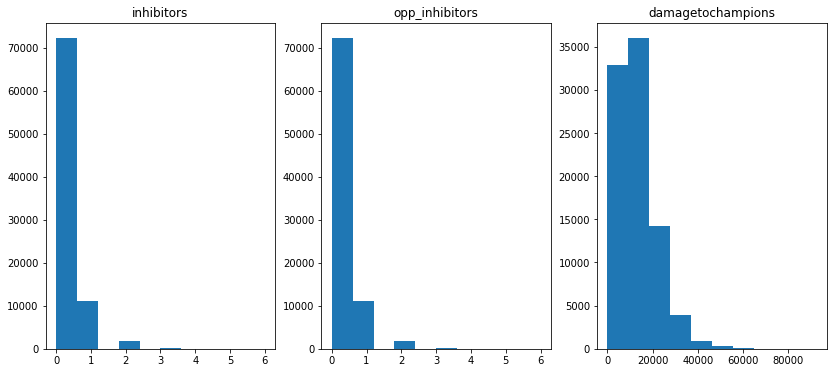

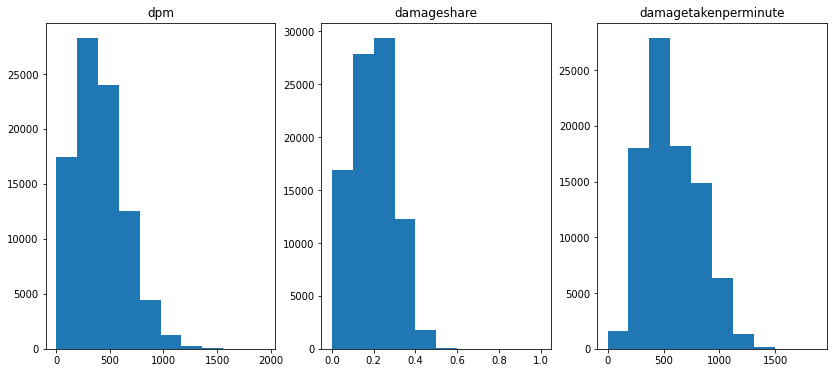

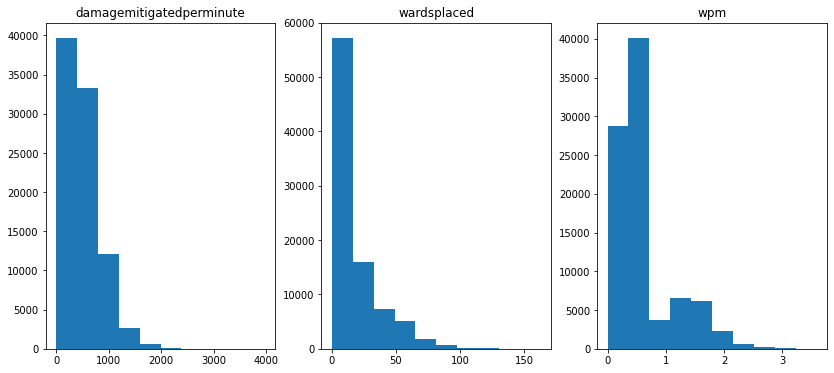

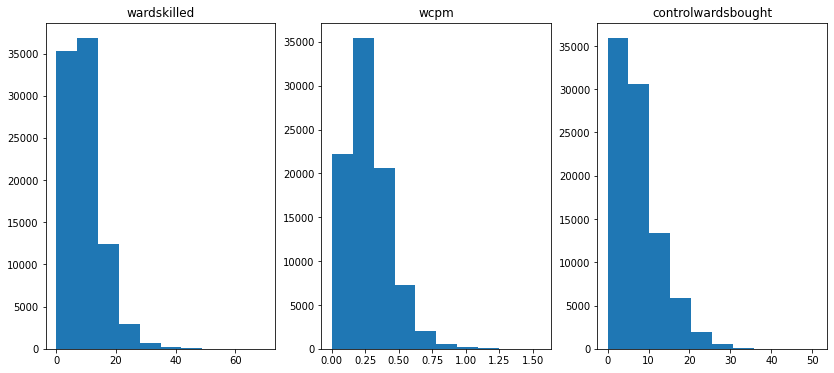

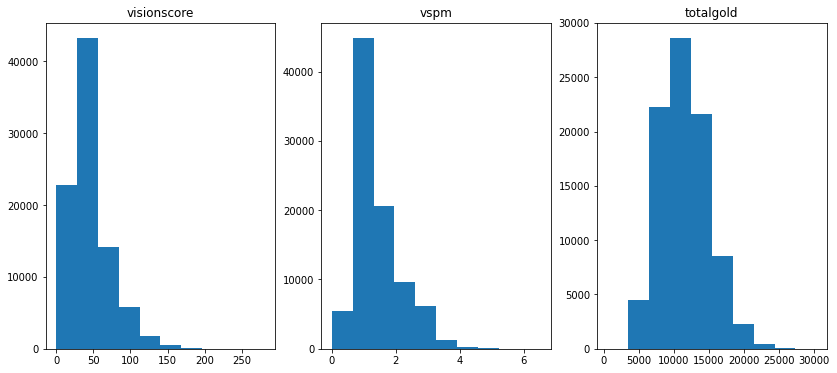

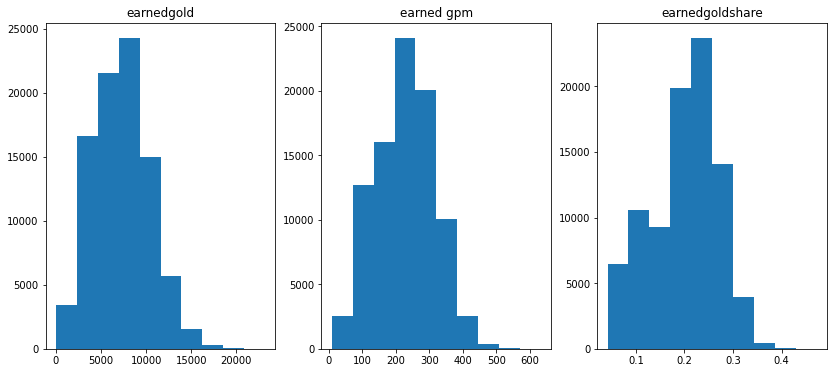

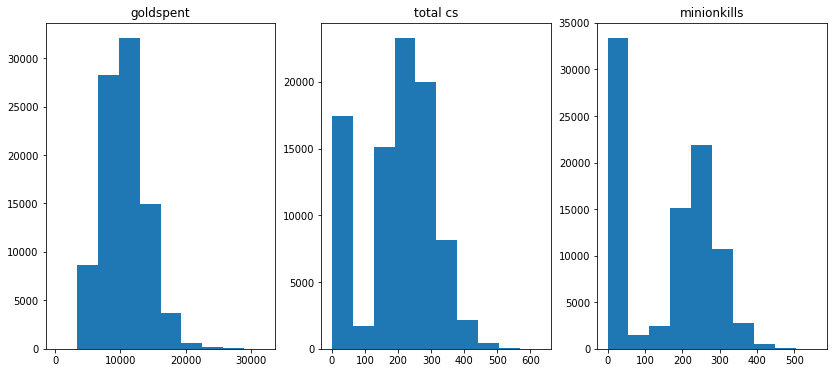

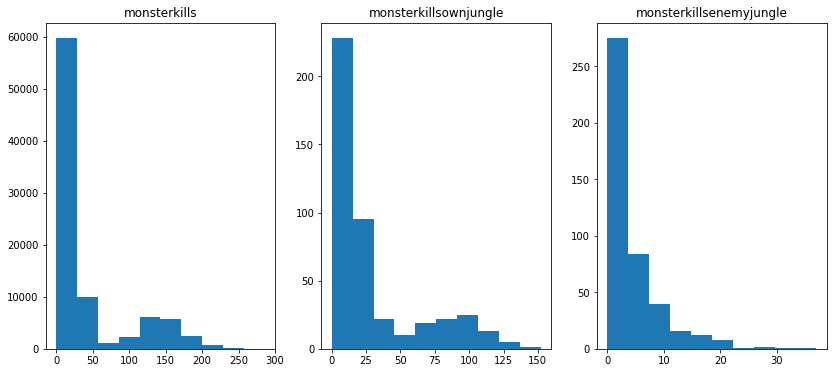

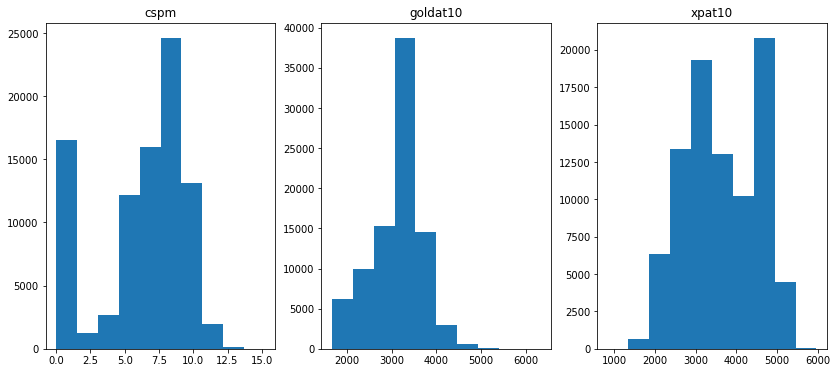

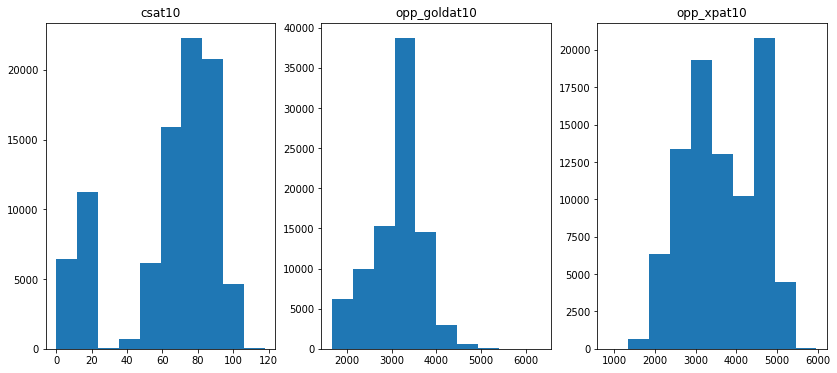

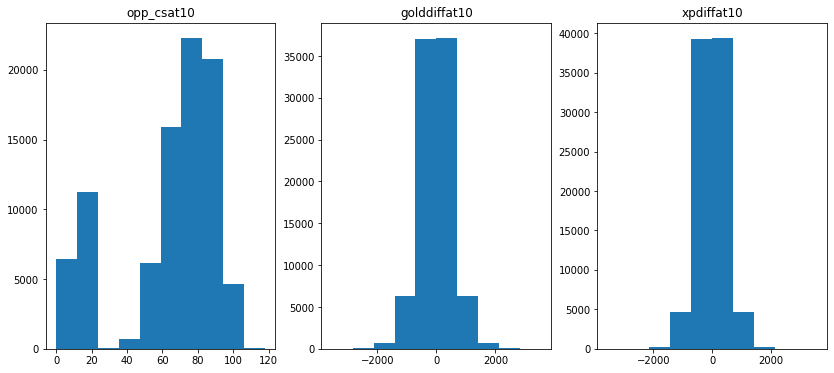

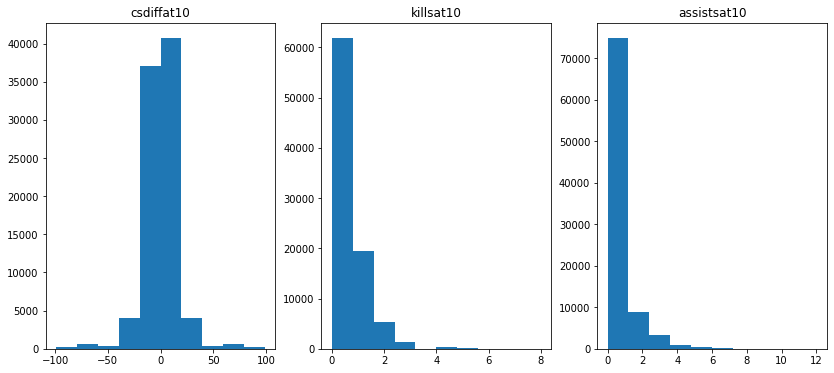

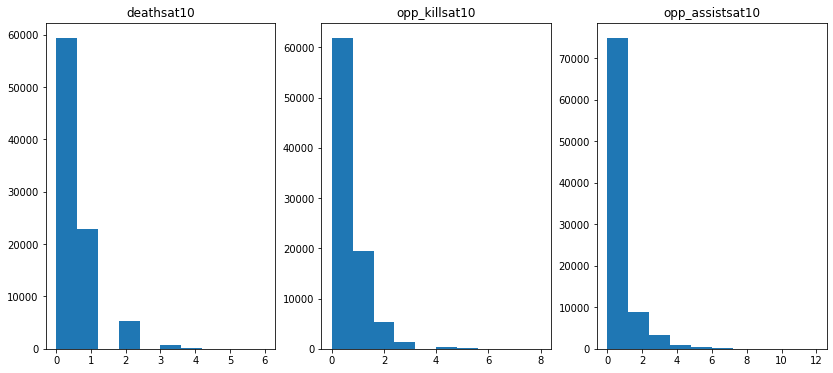

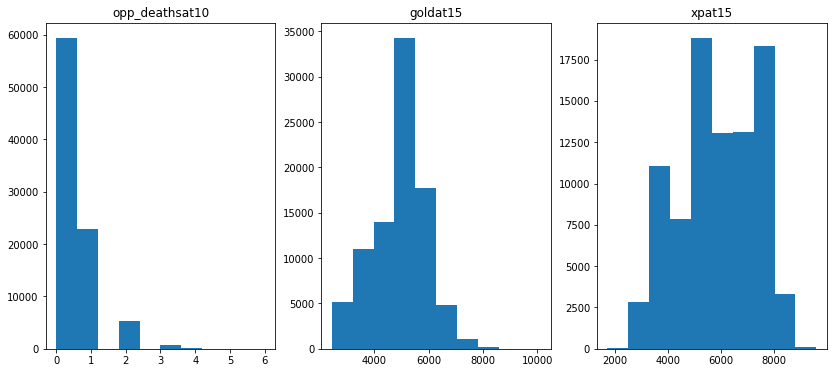

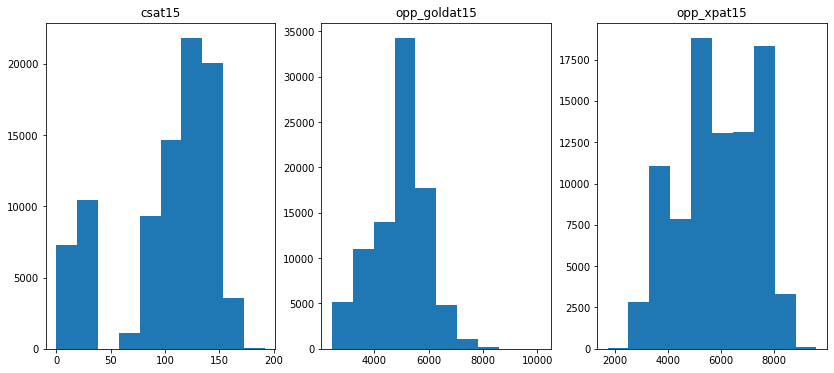

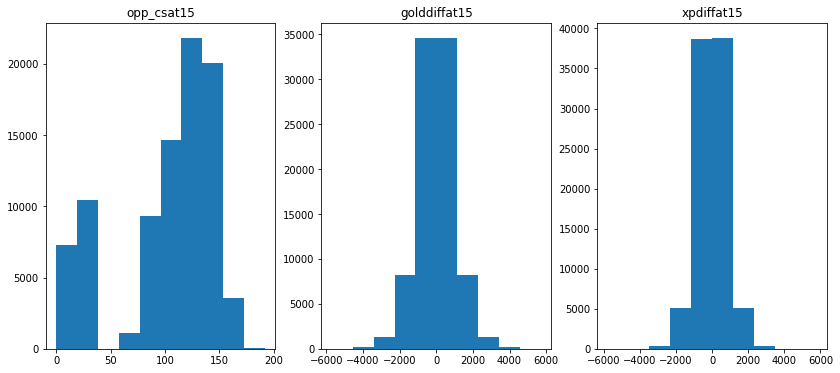

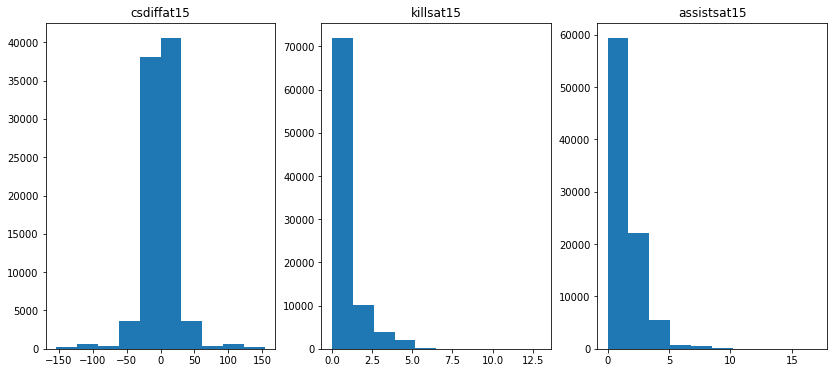

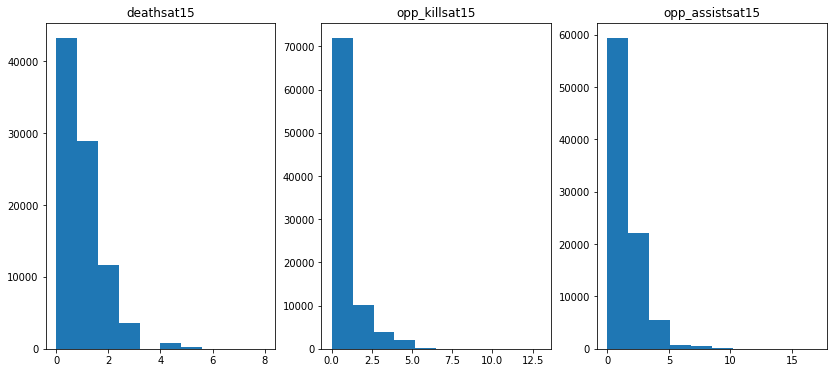

In [37]:

for i in range(0, len(continuous_features)-2, 3):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_figheight(6)
    fig.set_figwidth(14)
    ax1.hist(player_data_copy[continuous_features[i]])
    ax1.set_title(continuous_features[i])

    ax2.hist(player_data_copy[continuous_features[i+1]])
    ax2.set_title(continuous_features[i+1])

    ax3.hist(player_data_copy[continuous_features[i+2]])
    ax3.set_title(continuous_features[i+2])
    # plt.tight_layout()



# Find correlation between match result and all the other features

In [38]:
player_data_copy["result"].corr(player_data_copy["firstblood"])


0.1240692045163724

In [39]:
map_features = {}
for fname in player_data_copy.describe().columns:
    correlation = player_data_copy["result"].corr(player_data_copy[fname])
    map_features[fname] = correlation


In [40]:
from collections import OrderedDict
map_f = OrderedDict(sorted(map_features.items(), key=lambda x:x[1], reverse=True))


In [41]:
corr_df = pd.DataFrame(map_f.items(), columns=["Feature Name", "Correlation"])

In [42]:
corr_df.head(10)

,Feature Name,Correlation
0,result,1.000000
1,team kpm,0.690046
2,teamkills,0.686776
3,assists,0.550943
4,earned gpm,0.378506
5,kills,0.374218
6,inhibitors,0.348358
7,golddiffat15,0.326465
8,earnedgold,0.321039
9,totalgold,0.289337


In [43]:
corr_df.tail()

,Feature Name,Correlation
74,opp_assistsat15,-0.179193
75,opp_barons,-0.231171
76,opp_inhibitors,-0.348079
77,deaths,-0.512017
78,teamdeaths,-0.684924


## Separating the features and label

In [81]:
X = player_data_copy.drop("result", axis=1)
y = player_data_copy["result"]

## Splitting the data into train and test set

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Get the shape of X_train, X_test
X_train.shape, X_test.shape

((70720, 94), (17680, 94))

# Find the Categorical columns

In [84]:
# First get the data type of the columns
X_train.select_dtypes(include=["object"]).columns

Index(['gameid', 'league', 'split', 'side', 'position', 'playername',
       'playerid', 'teamname', 'teamid', 'champion', 'ban1', 'ban2', 'ban3',
       'ban4', 'ban5'],
      dtype='object')

## Analyze the data inside categorical columns
- The main aim is to see the values inside each column
- Figure out if any categorical column is important
- If it is then we need to do one hot encoding

In [86]:
# Split column
X_train.split.value_counts()

Summer     18804
Spring     16769
Split 1     3480
Split 2     2662
Winter      1619
Closing      728
Opening      724
Champ 1      674
Pro-Am       542
2022         165
Name: split, dtype: int64

In [87]:
# Side 
X_train.side.value_counts()

Red     35399
Blue    35321
Name: side, dtype: int64

In [88]:
X_train.position.value_counts()

top    14189
bot    14170
jng    14139
sup    14122
mid    14100
Name: position, dtype: int64

In [89]:
X_train.champion.value_counts()

Nautilus     2498
Aphelios     2283
Jinx         2268
Viego        2138
Gnar         1829
             ... 
Illaoi          3
Rammus          2
Warwick         1
Fizz            1
Master Yi       1
Name: champion, Length: 161, dtype: int64

In [90]:
X_train["ban1"]

92583       Kalista
108343    Seraphine
78444         Corki
71335           Zoe
103843        Corki
            ...    
9737          Yuumi
83034          Gwen
117324      Taliyah
2208          Akali
23225       Kha'Zix
Name: ban1, Length: 70720, dtype: object

In [91]:
X_train = X_train.reset_index(drop=True)

In [92]:
X_train.head()

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT03_2820464,LJL,2022,Summer,0,2022-07-03 08:41:33,1,12.11,4,Blue,...,149.0,-211.0,-148.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ESPORTSTMNT06_2530550,TCL,2022,Summer,0,2022-07-24 11:07:00,1,12.13,8,Red,...,108.0,1922.0,2053.0,16.0,4.0,1.0,1.0,1.0,0.0,3.0
2,ESPORTSTMNT05_2760593,UL,2022,NaN,0,2022-06-15 16:50:06,1,12.10,1,Blue,...,105.0,229.0,-75.0,23.0,0.0,0.0,1.0,0.0,1.0,0.0
3,ESPORTSTMNT01_2915679,LHE,2022,NaN,0,2022-06-01 01:30:43,1,12.09,8,Red,...,160.0,-914.0,-858.0,-34.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ESPORTSTMNT05_2943200,EBL,2022,NaN,0,2022-07-18 17:32:06,1,12.12,8,Red,...,116.0,-402.0,-369.0,-26.0,1.0,9.0,3.0,1.0,2.0,3.0


In [93]:
# Removing the categorical columns
cat_columns = ['gameid', 'league', 'split', 
'side', 'position', 'playername','playerid', 'teamname', 
'teamid', 'champion', 'ban1', 'ban2', 'ban3',
'ban4', 'ban5']
X_train = X_train.drop(cat_columns, axis=1)

X_test = X_test.drop(cat_columns, axis=1)

In [94]:
X_train.head()

,year,playoffs,date,game,patch,participantid,gamelength,kills,deaths,assists,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,2022,0,2022-07-03 08:41:33,1,12.11,4,1870,1,1,0,...,149.0,-211.0,-148.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022,0,2022-07-24 11:07:00,1,12.13,8,1295,12,1,1,...,108.0,1922.0,2053.0,16.0,4.0,1.0,1.0,1.0,0.0,3.0
2,2022,0,2022-06-15 16:50:06,1,12.10,1,1442,0,2,4,...,105.0,229.0,-75.0,23.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2022,0,2022-06-01 01:30:43,1,12.09,8,2245,4,3,10,...,160.0,-914.0,-858.0,-34.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022,0,2022-07-18 17:32:06,1,12.12,8,1498,5,3,18,...,116.0,-402.0,-369.0,-26.0,1.0,9.0,3.0,1.0,2.0,3.0


In [95]:
for c in X_train.columns:
    if "id" in c:
        print(c)

participantid


In [96]:
# Get rid of year and date and participantid
X_train = X_train.drop(["year", "date", "participantid"], axis=1)
X_test = X_test.drop(["year", "date", "participantid"], axis=1)


In [97]:
X_train

,playoffs,game,patch,gamelength,kills,deaths,assists,teamkills,teamdeaths,doublekills,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,0,1,12.11,1870,1,1,0,2,8,0.0,...,149.0,-211.0,-148.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,12.13,1295,12,1,1,35,8,2.0,...,108.0,1922.0,2053.0,16.0,4.0,1.0,1.0,1.0,0.0,3.0
2,0,1,12.10,1442,0,2,4,14,2,0.0,...,105.0,229.0,-75.0,23.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0,1,12.09,2245,4,3,10,19,7,1.0,...,160.0,-914.0,-858.0,-34.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,12.12,1498,5,3,18,35,9,0.0,...,116.0,-402.0,-369.0,-26.0,1.0,9.0,3.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70715,0,2,12.02,2309,0,3,8,13,19,0.0,...,109.0,673.0,1153.0,38.0,0.0,2.0,1.0,1.0,0.0,2.0
70716,0,1,12.11,1811,2,1,5,8,13,0.0,...,108.0,-754.0,-248.0,-13.0,0.0,3.0,0.0,0.0,0.0,1.0
70717,0,1,12.13,1784,4,0,5,14,3,1.0,...,112.0,717.0,1212.0,18.0,1.0,0.0,0.0,0.0,0.0,1.0
70718,0,1,12.01,1830,4,4,4,12,18,1.0,...,100.0,45.0,1215.0,19.0,2.0,2.0,2.0,2.0,2.0,2.0


## Feature scaling on the remaining data

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_transform = sc.transform(X_train)
X_test_transform = sc.transform(X_test)

In [138]:
from xgboost import XGBClassifier

# Create a model
model = XGBClassifier()

# Fit the model
model.fit(X_train_transform, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [139]:
# Selected features
model.feature_importances_

array([0.00596318, 0.00348314, 0.00439895, 0.00971266, 0.00396844,
       0.00337974, 0.00514515, 0.24599937, 0.21144074, 0.00140235,
       0.00112071, 0.        , 0.        , 0.00099037, 0.0055205 ,
       0.00200452, 0.00269469, 0.19415416, 0.00768768, 0.00980774,
       0.01285993, 0.0333585 , 0.02634029, 0.00313498, 0.00274304,
       0.00453896, 0.00324071, 0.002637  , 0.00275948, 0.00288795,
       0.00239107, 0.00268781, 0.00199585, 0.00332132, 0.00269804,
       0.00774379, 0.00707277, 0.01070573, 0.01205962, 0.00880373,
       0.00264186, 0.00364014, 0.00225496, 0.        , 0.        ,
       0.00358571, 0.00297019, 0.0030294 , 0.00276522, 0.00261322,
       0.00234367, 0.00293032, 0.00258209, 0.00283797, 0.00285116,
       0.00200633, 0.00310751, 0.00219911, 0.        , 0.00233883,
       0.00157063, 0.00425554, 0.00303649, 0.00239735, 0.00354106,
       0.00341154, 0.00330492, 0.00279427, 0.00259399, 0.003916  ,
       0.01257096, 0.00792076, 0.00582363, 0.0073468 , 0.00840

In [140]:
# Predict 
y_preds = model.predict(X_test_transform)

In [141]:
# Evaluate using the accuracy score 
from sklearn.metrics import accuracy_score, f1_score
accuracy_score(y_test, y_preds), f1_score(y_test, y_preds)

(0.9784502262443439, 0.9783805254496963)

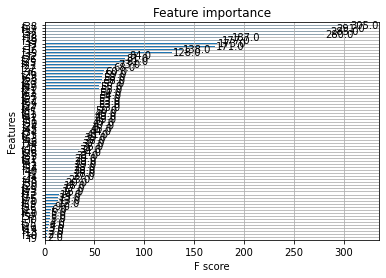

In [142]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [143]:
# Get feature names
for col, score in zip(X_train.columns, model.feature_importances_):
    print(col, score)

playoffs 0.005963177
game 0.0034831443
patch 0.0043989467
gamelength 0.00971266
kills 0.003968442
deaths 0.0033797412
assists 0.005145152
teamkills 0.24599937
teamdeaths 0.21144074
doublekills 0.0014023533
triplekills 0.0011207127
quadrakills 0.0
pentakills 0.0
firstblood 0.0009903715
firstbloodkill 0.005520504
firstbloodassist 0.0020045184
firstbloodvictim 0.0026946857
team kpm 0.19415416
ckpm 0.0076876786
barons 0.009807742
opp_barons 0.0128599275
inhibitors 0.033358503
opp_inhibitors 0.026340287
damagetochampions 0.0031349815
dpm 0.0027430449
damageshare 0.0045389556
damagetakenperminute 0.0032407115
damagemitigatedperminute 0.0026370035
wardsplaced 0.002759481
wpm 0.0028879505
wardskilled 0.0023910748
wcpm 0.0026878112
controlwardsbought 0.0019958506
visionscore 0.0033213173
vspm 0.0026980443
totalgold 0.0077437856
earnedgold 0.007072772
earned gpm 0.010705733
earnedgoldshare 0.0120596215
goldspent 0.00880373
total cs 0.0026418595
minionkills 0.0036401423
monsterkills 0.0022549625


> From model.feature_importances_ we can find the worst features and remove them so that we can remove it from the data and again train the model without these features
- Or we can get the top 40 features from the data

In [144]:
sorted_scores = np.sort(model.feature_importances_)[::-1]

In [145]:
sorted_scores

array([0.24599937, 0.21144074, 0.19415416, 0.0333585 , 0.02634029,
       0.01285993, 0.01257096, 0.01205962, 0.01070573, 0.00980774,
       0.00971266, 0.00880373, 0.00840027, 0.00792076, 0.00774379,
       0.00768768, 0.00756344, 0.0073468 , 0.00707277, 0.00596318,
       0.00582363, 0.0055205 , 0.00514515, 0.00453896, 0.00439895,
       0.00425554, 0.00396844, 0.003916  , 0.00364014, 0.00358571,
       0.00354106, 0.00348314, 0.00341154, 0.00337974, 0.00332132,
       0.00330492, 0.00324071, 0.00313498, 0.00310751, 0.00303649,
       0.0030294 , 0.00297019, 0.00293032, 0.00288795, 0.00285116,
       0.00283797, 0.00279427, 0.00276522, 0.00275948, 0.00274304,
       0.00269804, 0.00269469, 0.00268781, 0.00264186, 0.002637  ,
       0.00261322, 0.00259399, 0.00258209, 0.00239735, 0.00239107,
       0.00234367, 0.00233883, 0.00225496, 0.00219911, 0.00200633,
       0.00200452, 0.00199585, 0.00157063, 0.00140235, 0.00112071,
       0.00099037, 0.        , 0.        , 0.        , 0.     

In [146]:
indices = []
for s in sorted_scores:
    idx = np.where(model.feature_importances_ == s)
    indices.append(idx[0][0])
print(indices[:40])


[7, 8, 17, 21, 22, 20, 70, 38, 37, 19, 3, 39, 74, 71, 35, 18, 75, 73, 36, 0, 72, 14, 6, 25, 2, 61, 4, 69, 41, 45, 64, 1, 65, 5, 33, 66, 26, 23, 56, 62]


## Get top 40 features

In [151]:
top_40_features = []
for idx in indices[:40]:
    top_40_features.append(X_train.columns[idx])

In [152]:
print(top_40_features)

['teamkills', 'teamdeaths', 'team kpm', 'inhibitors', 'opp_inhibitors', 'opp_barons', 'killsat15', 'earnedgoldshare', 'earned gpm', 'barons', 'gamelength', 'goldspent', 'opp_assistsat15', 'assistsat15', 'totalgold', 'ckpm', 'opp_deathsat15', 'opp_killsat15', 'earnedgold', 'playoffs', 'deathsat15', 'firstbloodkill', 'assists', 'damageshare', 'patch', 'goldat15', 'kills', 'csdiffat15', 'minionkills', 'cspm', 'opp_goldat15', 'game', 'opp_xpat15', 'deaths', 'visionscore', 'opp_csat15', 'damagetakenperminute', 'damagetochampions', 'assistsat10', 'xpat15']
